<a href="https://colab.research.google.com/github/sayalive/supervised_learning_classification/blob/main/Health_insurance_cell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Sayali Shirishrao Deshmukh


# **Project Summary -**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

# **GitHub Link -**

https://github.com/sayalive/supervised_learning_classification.git

# **Problem Statement**


**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries
To understand the data we have to first import libraries.

In [73]:
# Import Libraries
#basic library
import pandas as pd
import numpy as np

#plotation

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

#ML Models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

#Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

#Hyper Parameter Tuning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


#Miscellaneous
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading
To load dataset first we have to first mount the drive.

#Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Almabetter/Supervised_ML_Classification/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

### Dataset First View

In [5]:
# Dataset First Look
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(381109, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df[df.duplicated()].shape

(0, 12)

As we can see that there are(0,12)duplicate values in datset.

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,False,False,False,False,False,False,False,False,False,False,False,False
381105,False,False,False,False,False,False,False,False,False,False,False,False
381106,False,False,False,False,False,False,False,False,False,False,False,False
381107,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Visualizing the missing values


df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### What did you know about your dataset?

As we see dataset contain 381109 rows and 12 columns.

We donot have any null values in our dataset.

We have 5 categorical and 4 numeric independent features.

Our dependent feature is categorical column(Response).

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

The column names are appeared here that are id,gender,age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response.

Datatye of all columns are object.

In [12]:
# Dataset Describe
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


All detail description of each field or column are described here.

### Variables Description

Following data shows Variable Description of each column.

**ID**: Unique identifier for the Customer.

**Age**: Age of the Customer.

**Gender**: Gender of the Customer.

**Driving_License**: 0 for customer not having DL, 1 for customer having DL.

**Region_Code**: Unique code for the region of the customer.

**Previously_Insured**: 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.

**Vehicle_Age**: Age of the vehicle.

**Vehicle_Damage**: Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

**Annual_Premium**: The amount customer needs to pay as premium in the year.

**Policy_Sales_Channel**: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

**Vintage**: Number of Days, Customer has been associated with the company.

**Response (Dependent Feature)**: 1 for Customer is interested, 0 for Customer is not interested.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
df['id'].unique()


array([     1,      2,      3, ..., 381107, 381108, 381109])

In [14]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
df['Age'].unique()

array([44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 37, 25, 42, 60, 65, 49,
       34, 51, 26, 57, 79, 48, 45, 72, 30, 54, 27, 38, 22, 78, 20, 39, 62,
       58, 59, 63, 50, 67, 77, 28, 69, 52, 31, 33, 43, 36, 53, 70, 46, 55,
       40, 61, 75, 64, 35, 66, 68, 74, 73, 84, 83, 81, 80, 82, 85])

In [16]:
df['Driving_License'].unique()

array([1, 0])

In [17]:
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [18]:
df['Previously_Insured'].unique()

array([0, 1])

In [19]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [20]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df['Annual_Premium'].unique()

array([ 40454.,  33536.,  38294., ...,  20706., 101664.,  69845.])

In [22]:
df['Policy_Sales_Channel'].unique()

array([ 26., 152., 160., 124.,  14.,  13.,  30., 156., 163., 157., 122.,
        19.,  22.,  15., 154.,  16.,  52., 155.,  11., 151., 125.,  25.,
        61.,   1.,  86.,  31., 150.,  23.,  60.,  21., 121.,   3., 139.,
        12.,  29.,  55.,   7.,  47., 127., 153.,  78., 158.,  89.,  32.,
         8.,  10., 120.,  65.,   4.,  42.,  83., 136.,  24.,  18.,  56.,
        48., 106.,  54.,  93., 116.,  91.,  45.,   9., 145., 147.,  44.,
       109.,  37., 140., 107., 128., 131., 114., 118., 159., 119., 105.,
       135.,  62., 138., 129.,  88.,  92., 111., 113.,  73.,  36.,  28.,
        35.,  59.,  53., 148., 133., 108.,  64.,  39.,  94., 132.,  46.,
        81., 103.,  90.,  51.,  27., 146.,  63.,  96.,  40.,  66., 100.,
        95., 123.,  98.,  75.,  69., 130., 134.,  49.,  97.,  38.,  17.,
       110.,  80.,  71., 117.,  58.,  20.,  76., 104.,  87.,  84., 137.,
       126.,  68.,  67., 101., 115.,  57.,  82.,  79., 112.,  99.,  70.,
         2.,  34.,  33.,  74., 102., 149.,  43.,   

In [23]:
df['Vintage'].unique()

array([217, 183,  27, 203,  39, 176, 249,  72,  28,  80,  46, 289, 221,
        15,  58, 147, 256, 299, 158, 102, 116, 177, 232,  60, 180,  49,
        57, 223, 136, 222, 149, 169,  88, 253, 107, 264, 233,  45, 184,
       251, 153, 186,  71,  34,  83,  12, 246, 141, 216, 130, 282,  73,
       171, 283, 295, 165,  30, 218,  22,  36,  79,  81, 100,  63, 242,
       277,  61, 111, 167,  74, 235, 131, 243, 248, 114, 281,  62, 189,
       139, 138, 209, 254, 291,  68,  92,  52,  78, 156, 247, 275,  77,
       181, 229, 166,  16,  23,  31, 293, 219,  50, 155,  66, 260,  19,
       258, 117, 193, 204, 212, 144, 234, 206, 228, 125,  29,  18,  84,
       230,  54, 123, 101,  86,  13, 237,  85,  98,  67, 128,  95,  89,
        99, 208, 134, 135, 268, 284, 119, 226, 105, 142, 207, 272, 263,
        64,  40, 245, 163,  24, 265, 202, 259,  91, 106, 190, 162,  33,
       194, 287, 292,  69, 239, 132, 255, 152, 121, 150, 143, 198, 103,
       127, 285, 214, 151, 199,  56,  59, 215, 104, 238, 120,  2

In [24]:
df['Response'].unique()

array([1, 0])

## 3. ***Data Wrangling***

### Data Wrangling Code

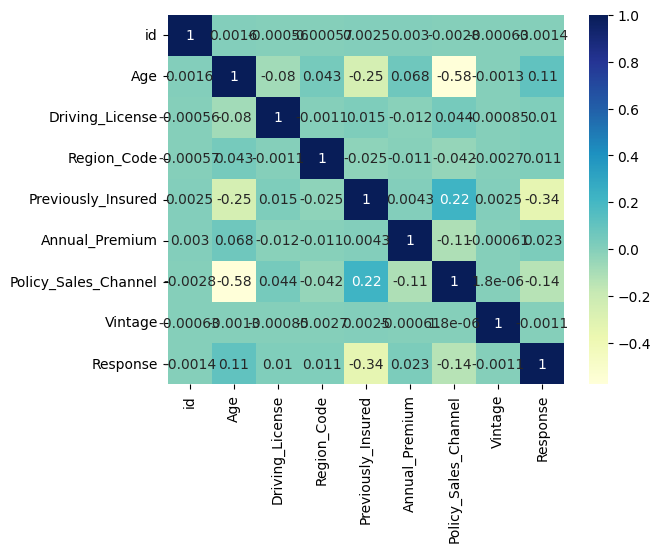

In [25]:
# Write your code to make your dataset analysis ready.
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

### What all manipulations have you done and insights you found?

The correlation matrix is passed to the sns.heatmap() function from seaborn, which generates the heatmap plot. The annot=True parameter adds the numerical values to the plot, while cmap='YlGnBu' sets the color scheme to a blue-to-red gradient.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Univariate Analysis**

#### Chart - 1

<Axes: xlabel='Response', ylabel='count'>

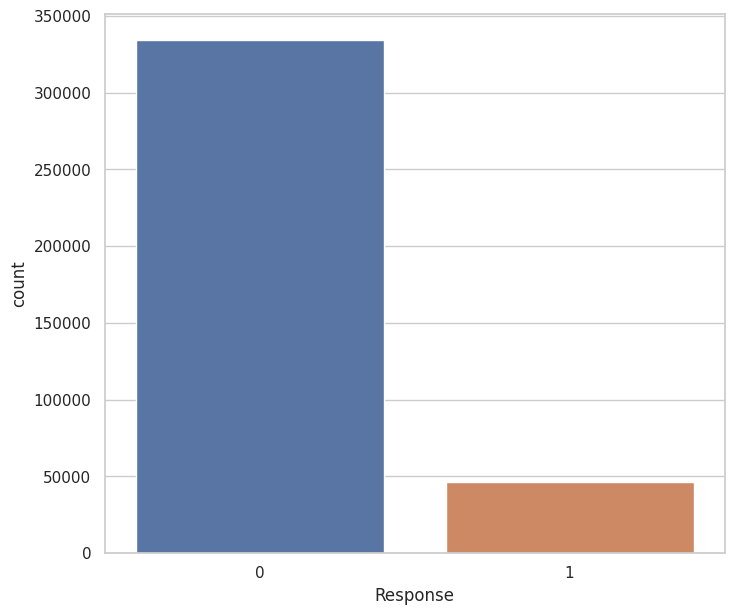

In [26]:
# Dependent Variable 'Response'
plt.figure(figsize = (8,7))
sns.set_theme(style = 'whitegrid')
sns.countplot(x = df['Response'], data = df)

##### 1. Why did you pick the specific chart?

I choose this because a Seaborn countplot is ideal for visually highlighting the differences between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

Most people choose not to buy vechicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The plot reveals a small customer base that prefers purchasing vehicle insurance, indicating a negative impact on the business.

#### Chart - 2

<Axes: xlabel='Age', ylabel='count'>

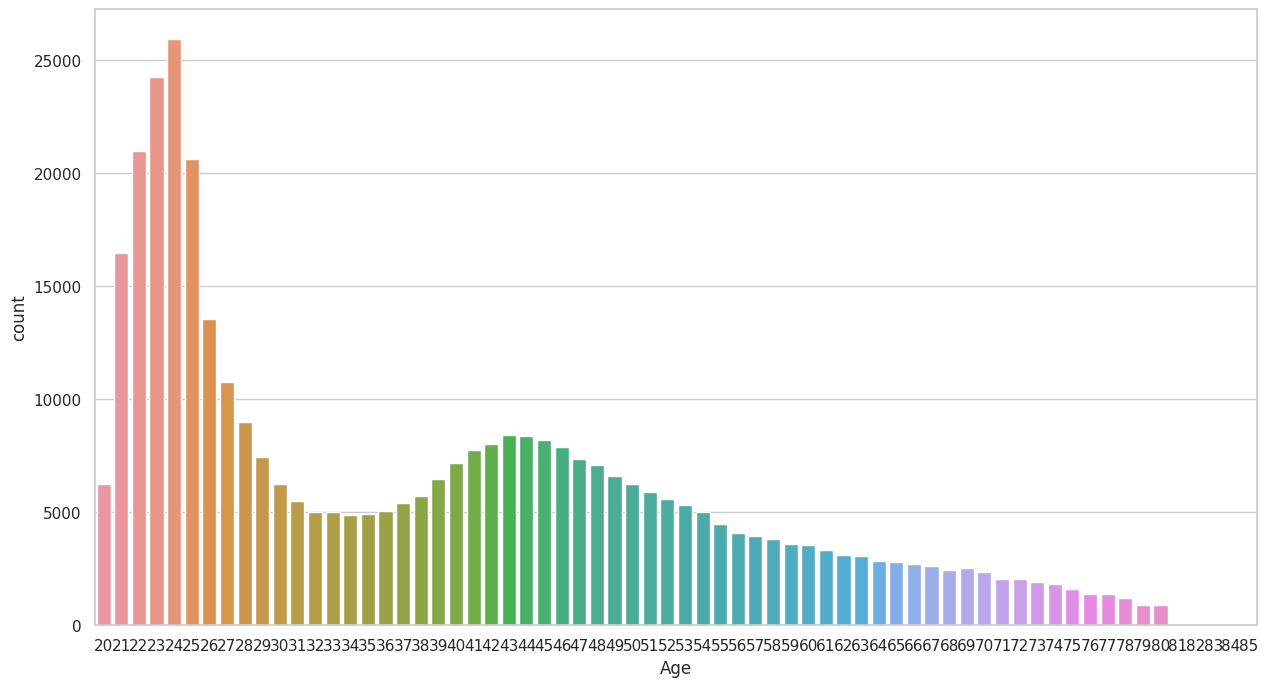

In [27]:
# Chart - 2 visualization code
#Distribution of Age
plt.figure(figsize = (15,8))
sns.countplot(x=df['Age'],data=df)

##### 1. Why did you pick the specific chart?

I choose this chart because the count plot, visually represents the spread and pattern of continuous data variables. It provides an overview of the data distribution using Seaborn's distplot function.

##### 2. What is/are the insight(s) found from the chart?

Based on the plot, it is evident that the age range of 22-25 has the highest number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The majority of responses received are from the age groups 22-25, suggesting that targetting these age groups can contribute to business growth.

#### Chart - 3

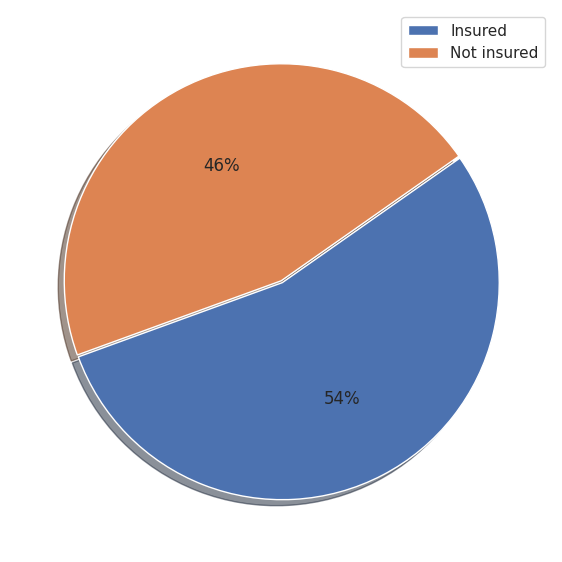

In [28]:
# Chart - 3 visualization code
# Insured and uninsuerd data
plt.figure(figsize=(7,9))
plt.pie(df['Previously_Insured'].value_counts(), autopct='%.0f%%', shadow=True, startangle=200, explode=[0.01,0])
plt.legend(labels=['Insured','Not insured'])
plt.show()

##### 1. Why did you pick the specific chart?

I choose this  pie chart, which is created using the Matplotlib library, is a useful tool for visually representing the proportion or distribution of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

The Pie Chart illustrates the distribution of responses among individuals based on their previous insurance status. It indicates that people who do not have prior insurance coverage tend to overwhelmingly choose to opt in for vehicle insurance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing the Pie Chart, the company can identify an opportunity to specifically target customers who do not have previous vehicle insurance. These customers are more likely to be open to considering and opting in for vehicle insurance. Therefore, the company can focus its efforts on actively reaching out to this particular group of customers.

#### Chart - 4

<Axes: xlabel='Annual_Premium', ylabel='Density'>

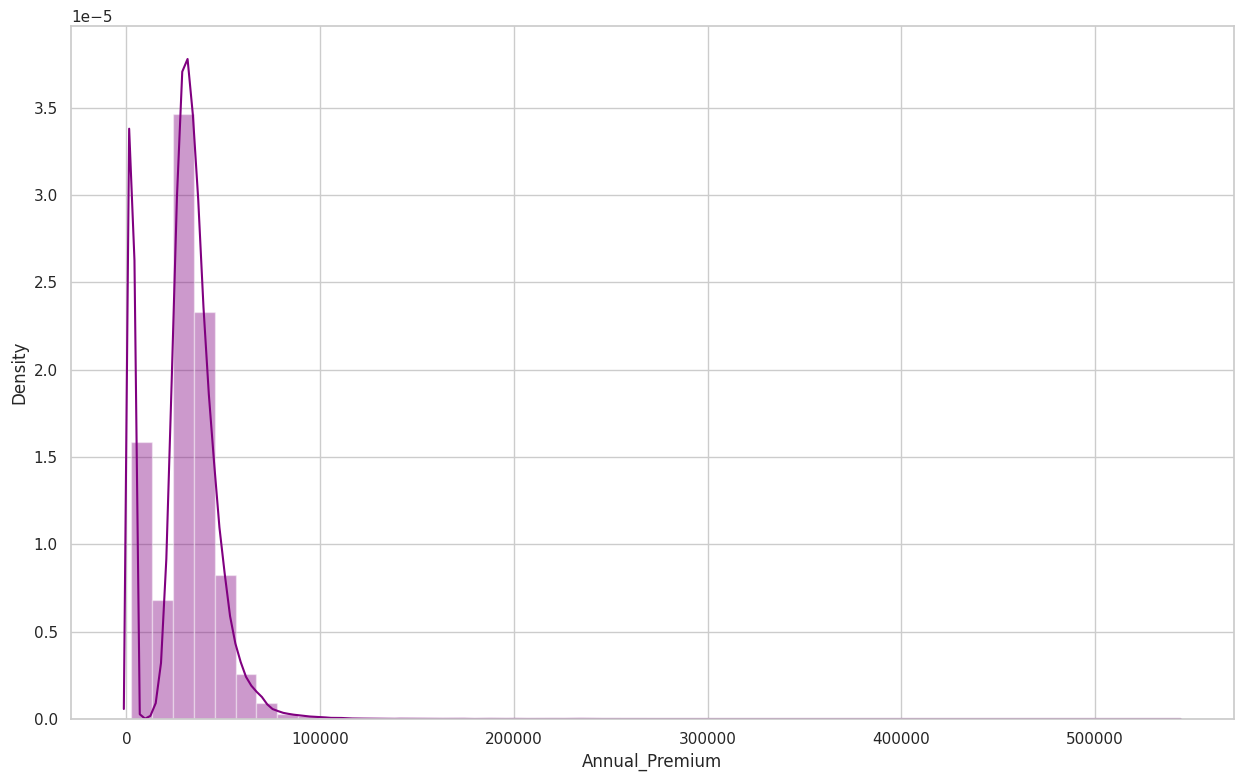

In [29]:
# Chart - 4 visualization code
plt.figure(figsize=(15,9))
a=df['Annual_Premium']
sns.distplot(a, color='purple')

##### 1. Why did you pick the specific chart?

I choose a distribution plot beacause it is a visual representation that shows how data is distributed or spread out. It is particularly useful for continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

The majority of customers tend to have subscription prices that are centered around $50,000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The plot indicates that customers who chose vehicle insurance are more inclined towards higher premium options. This is advantageous for the business as it leads to increased revenue.


#### Chart - 5

<Axes: >

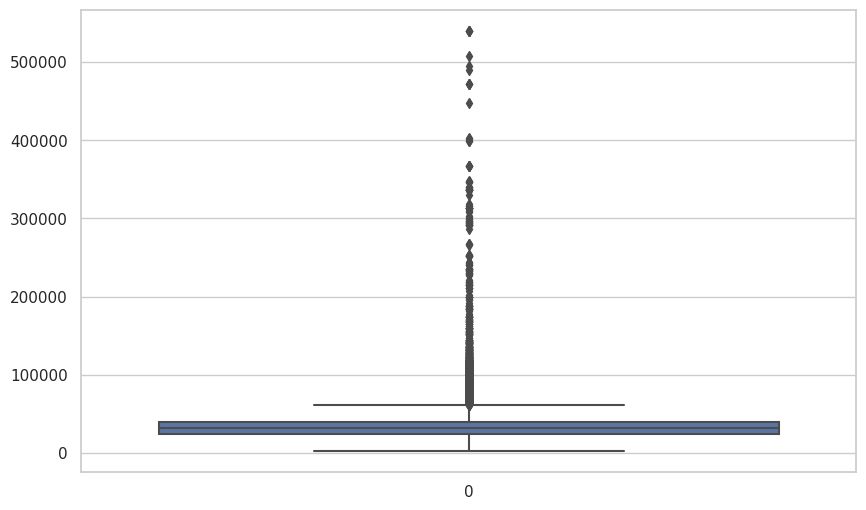

In [30]:
# Chart - 5 visualization code
plt.figure(figsize=(10,6))
sns.boxplot(df['Annual_Premium'])

##### 2. What is/are the insight(s) found from the chart?

For the above boxplot chart we get insight that there's a lot of outliers in the annual premium.

#### Chart - 6

<Axes: xlabel='Vehicle_Damage', ylabel='count'>

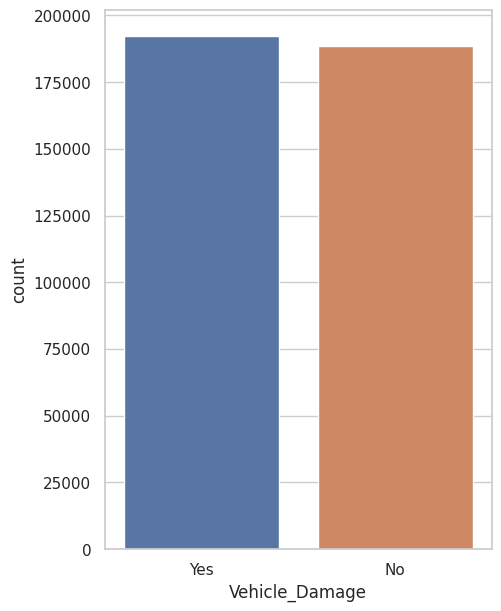

In [31]:
# Chart - 6 visualization code
plt.figure(figsize=(5,7))
sns.countplot(x=df['Vehicle_Damage'])

##### 1. Why did you pick the specific chart?

I choose this because a Seaborn countplot is ideal for visually highlighting the differences between two values of a variable.

##### 2. What is/are the insight(s) found from the chart?

From above countplot chart we get insight that the Customers which have Vehicle_Damage are more likely to buy insurance. than the customer who does'nt have vehicle Damage

#### Chart - 7

<Axes: >

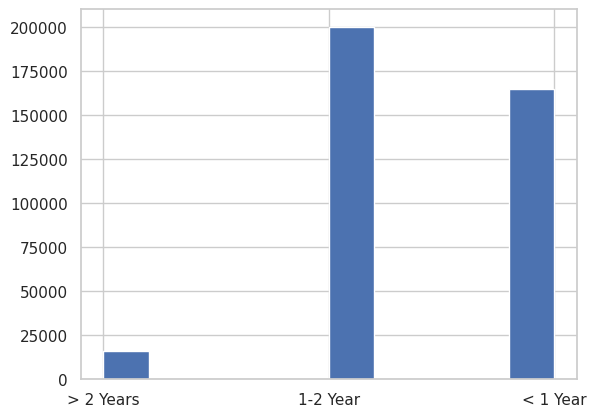

In [32]:
# Chart - 7 visualization code
df['Vehicle_Age'].hist()

##### 1. Why did you pick the specific chart?

A histogram, created using the matplotlib library, is a useful tool for visualizing the distribution of values for a specific variable.

##### 2. What is/are the insight(s) found from the chart?

From above histogram chart we get insight that most of people are having vehicle age between 1 or 2 years and very few peoples are having vehicle age more than 2 years.

###**Bivariate Analysis**

#### Chart - 8

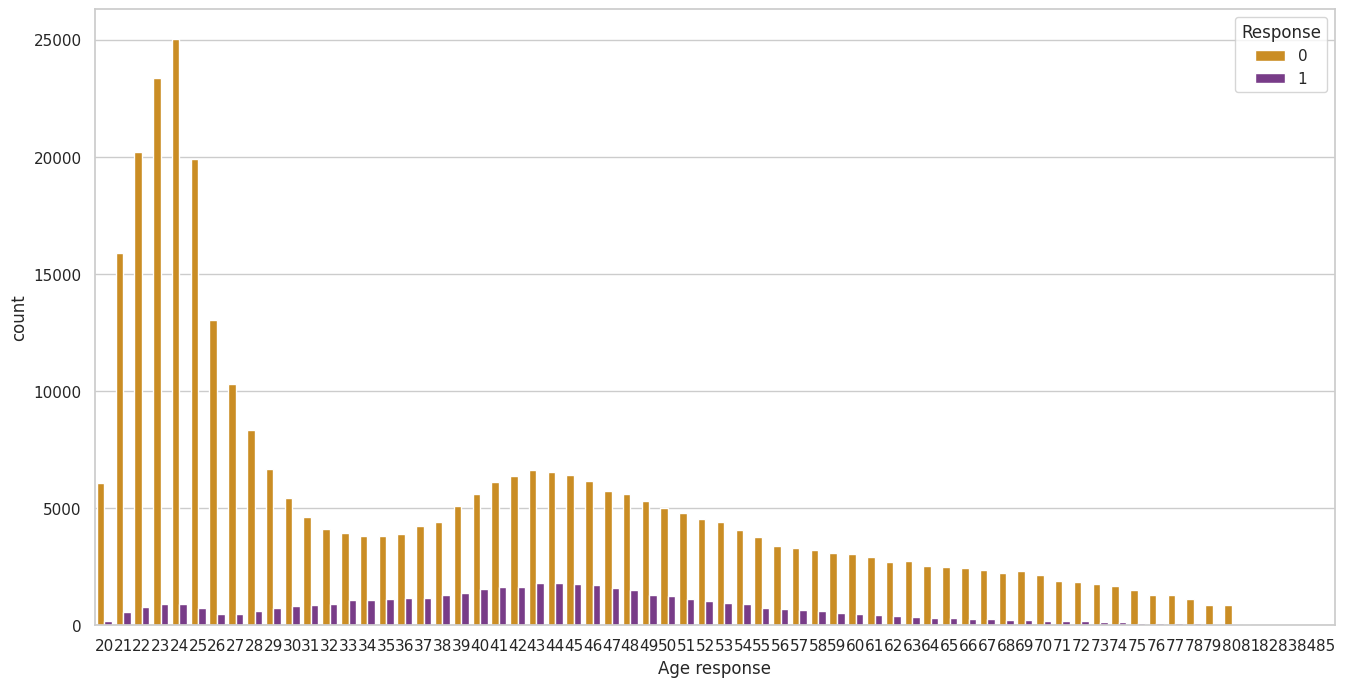

In [33]:
# Chart - 8 visualization code
# Age vs Response
plt.figure(figsize=(16,8))
sns.countplot(data=df, x='Age', hue='Response', palette='CMRmap_r')
plt.xlabel('Age response')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

I choose this chart because the countplot, visually represents the spread and pattern of continuous data variables. It provides an overview of the data distribution using Seaborn's distplot function.

##### 2. What is/are the insight(s) found from the chart?

From above countplot chart we get insight that People ages between from 31 to 50 are more likely to respond. While Young people below 30 are not interested in vehicle insurance.

#### Chart - 9

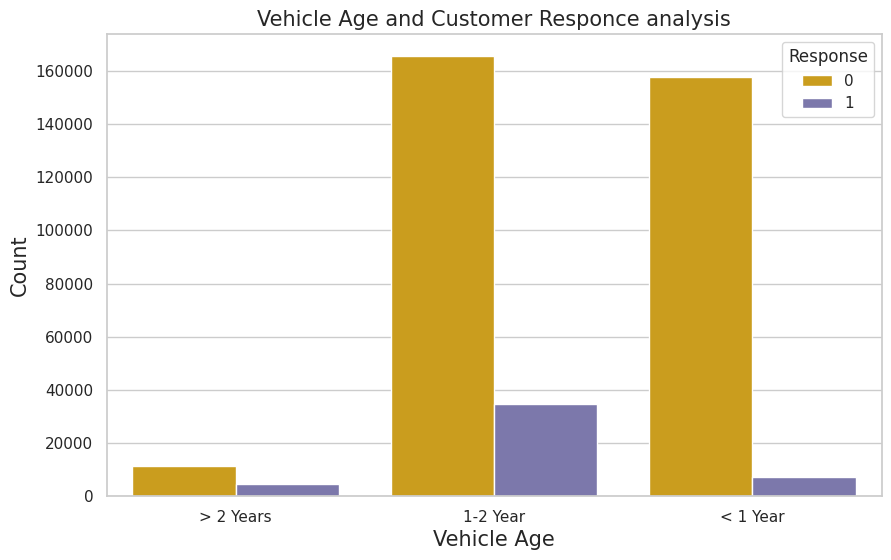

In [34]:
# Chart - 9 visualization code
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Vehicle_Age', hue='Response', palette='Dark2_r')
plt.xlabel('Vehicle Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Vehicle Age and Customer Responce analysis', fontsize=15)
plt.show()

##### 1. Why did you pick the specific chart?

 I choose this chart because the countplot, visually represents the spread and pattern of continuous data variables. It provides an overview of the data distribution using Seaborn's distplot function.

##### 2. What is/are the insight(s) found from the chart?

from above countplot we get insight that the Customers with vehicle age 1-2 years are more likely to interested in buying insurance as compared to the other two and Customers with vehicle age  <1 years have very less chances of buying insurance.




#### Chart - 10

<Axes: xlabel='Response', ylabel='Annual_Premium'>

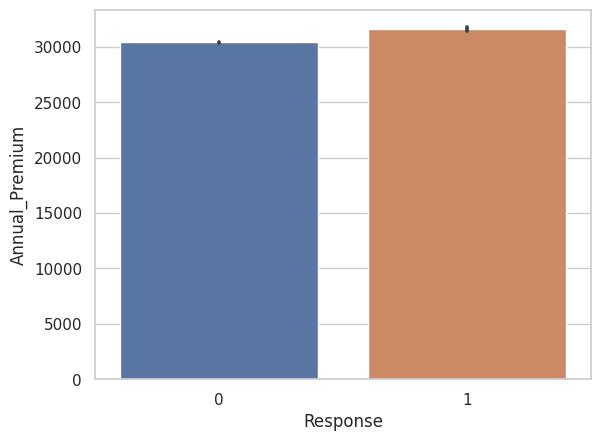

In [35]:
# Chart - 10 visualization code
sns.barplot(x='Response', y='Annual_Premium', data=df)

##### 1. Why did you pick the specific chart?

I choose this because a bar chart from the matplotlib library is a useful way to visually represent the proportions of different values within a variable.

##### 2. What is/are the insight(s) found from the chart?

From the above bar chart we get insight that the People who response have slightly higher annual premium

#### Chart - 11

<Axes: >

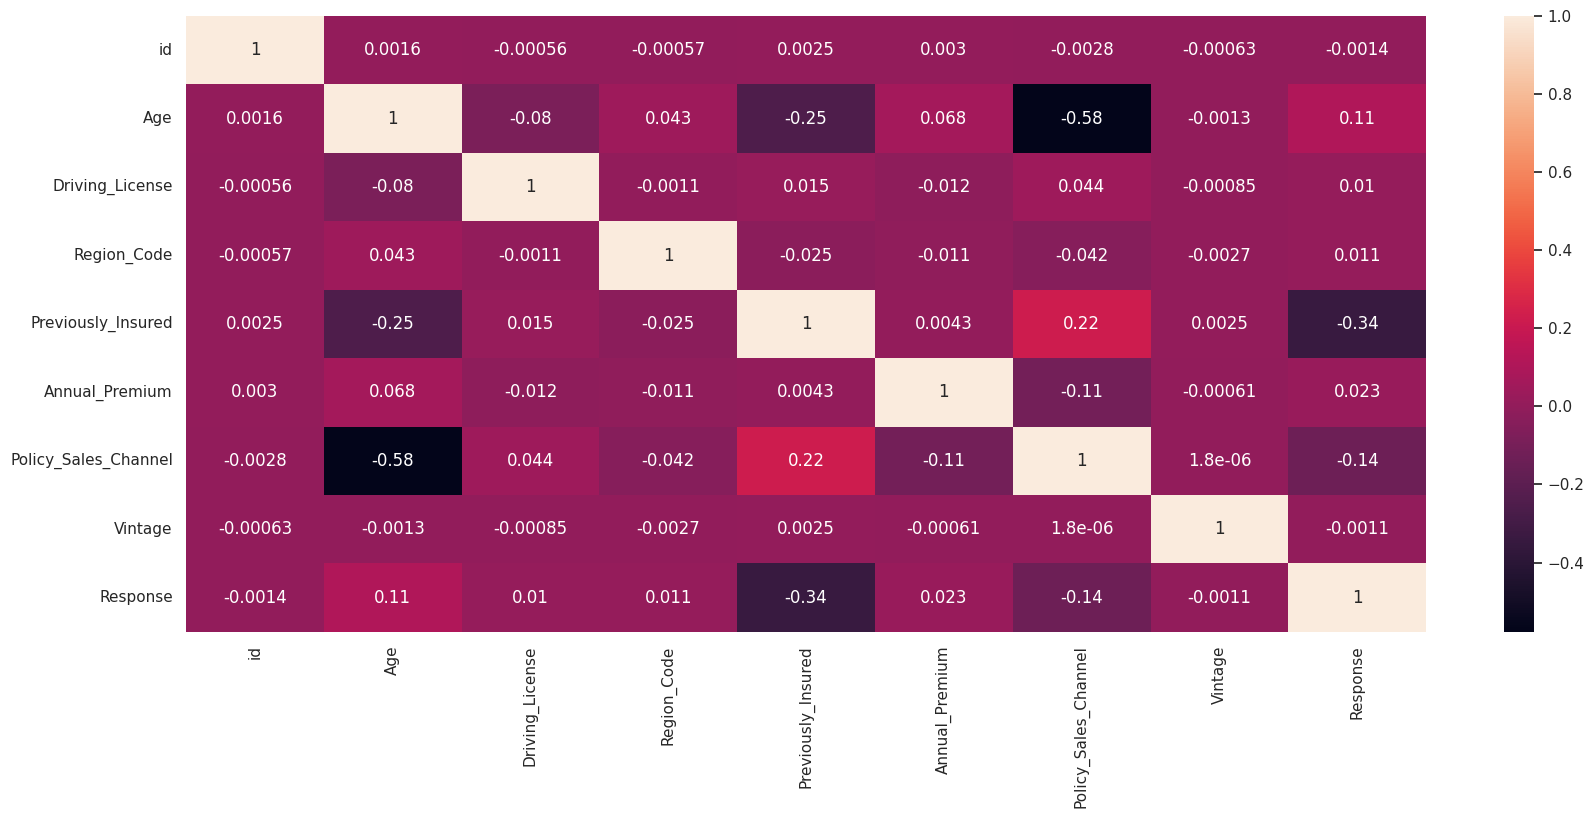

In [36]:
# Chart - 11 visualization code
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(), annot=True)

##### 1. Why did you pick the specific chart?

I choose this beacuse a correlation plot visually represents the relationships between variables in a dataset. It displays the correlation of each variable with itself and with other columns using a heatmap of colors.

##### 2. What is/are the insight(s) found from the chart?

From above coorelation plot we seen that Target variable is not much affected by Vintage variable. We can drop least correlated variables

#### Chart - 12

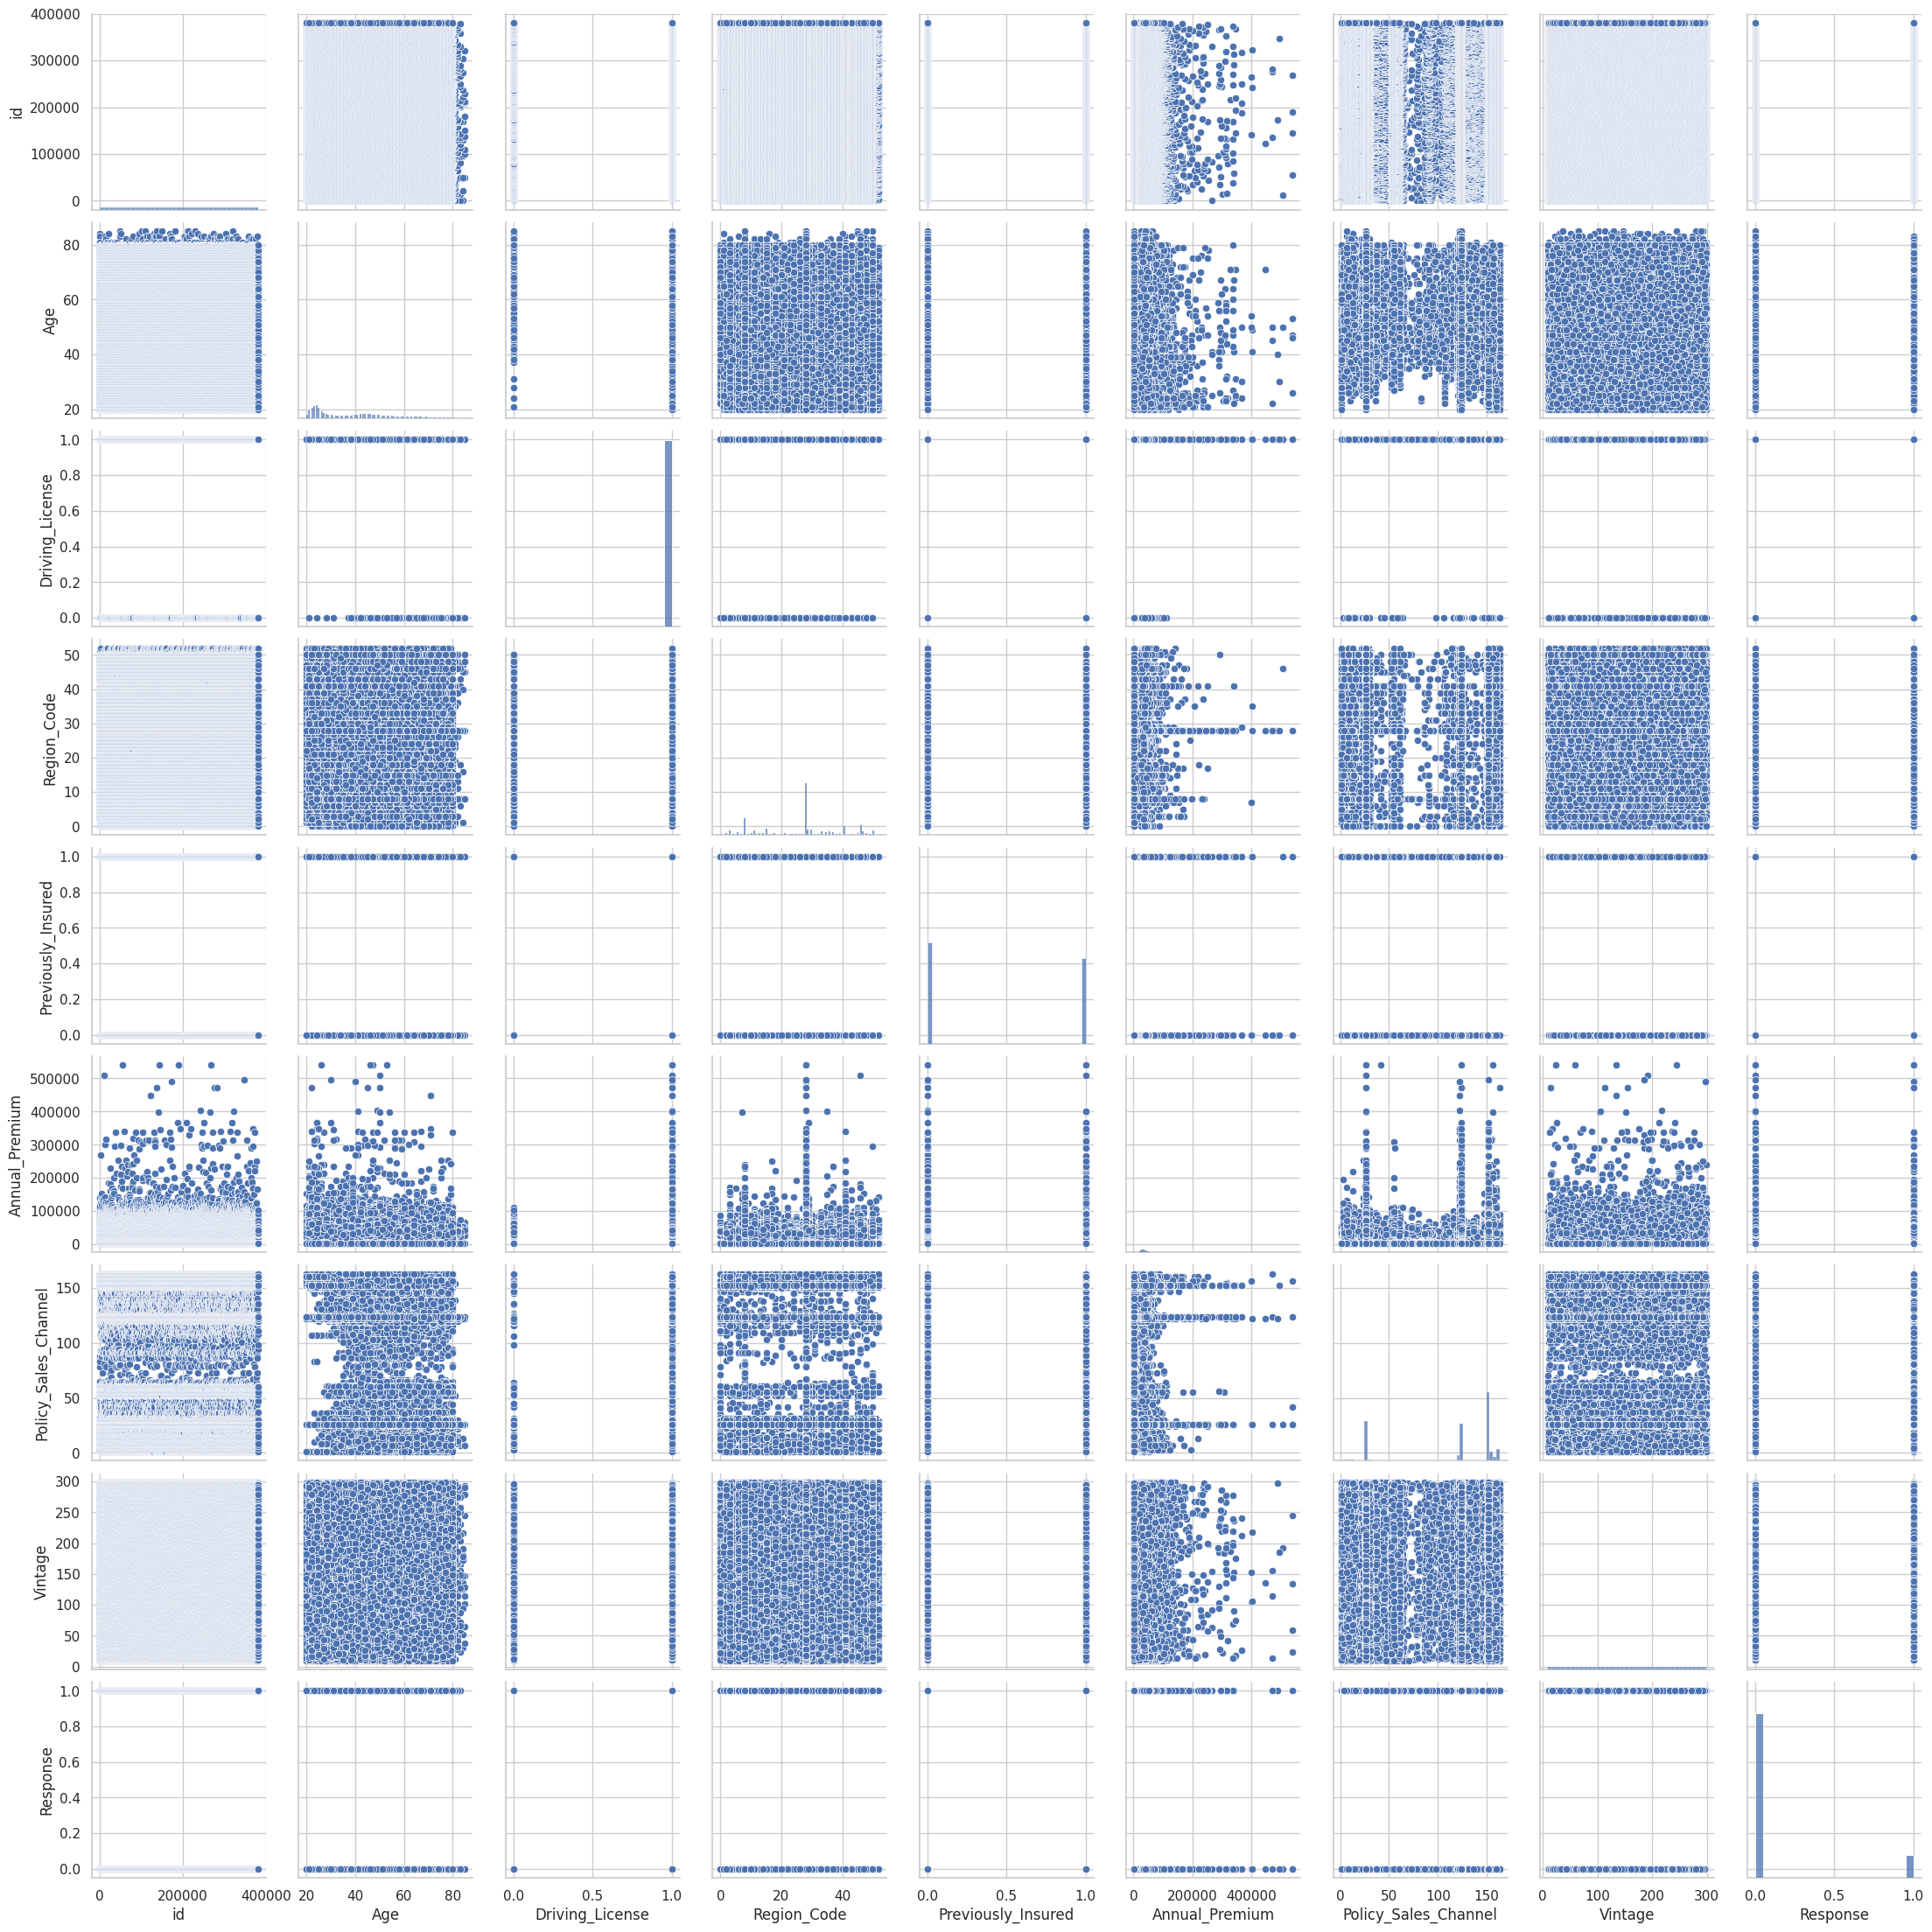

In [37]:
# Chart - 12 visualization code
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

The Seaborn Pairplot is a useful tool for visualizing relationships between variables in a dataset. This makes it easier to interpret and understand the data, as it condenses a large amount of information into a single figure.

##### 2. What is/are the insight(s) found from the chart?

By generating scatterplots the Pairplot function in Seaborn allowed us to visually explore and understand the relationships between different columns in the dataset.

# **Conclusion of EDA**

1.Most of the costumers who have the vehicle or who owns the vehicle age is ranges between 21 to 25 years. There are few costumers who have vehicle above the of 60 years.

2.54% customers are previously insured and 46% customers are not insured yet.and also Customer who are not previously insured are likely to be insured.

3.The Customers which have Vehicle_Damage are more likely to buy insurance. than the customer who does'nt have vehicle Damage.

4.Most of people are having vehicle age between 1 or 2 years and very few peoples are having vehicle age more than 2 years

5.People ages between from 31 to 50 are more likely to respond. While Young people below 30 are not interested in vehicle insurance.

6.The Male category having a vehicle is slightly greater than that of female category and chances of buying insurance is also little high.

7.The Customers with vehicle age 1-2 years are more likely to interested in buying insurance as compared to the other two and Customers with vehicle age <1 years have very less chances of buying insurance.

8.the People who response have slightly higher annual premium.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1
**Males are more interested in buying vehicle insurance.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null Hypothesis:*** No, Males aren't more interested in buying Vehicle Insurance

***Alternative Hypothesis:*** Yes, Males are more interested in buying Vehicle Insurance

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
hyp_data = pd.crosstab(df['Response'],df['Gender'],margins=False)
hyp_data

Gender,Female,Male
Response,,
0,156835,177564
1,18185,28525


##Set significance level to 0.05

In [39]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

stats,p,dof,expected = chi2_contingency(hyp_data)
p


7.665800628415621e-230

##### Which statistical test have you done to obtain P-Value?

We used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

### Hypothetical Statement - 2
**As the number of days a customer is associated with the company increase, the chances that the customer will opt in for vehicle insurance increases.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: No, as the number of days a customer is associated with the company is increases, customer isn't likely to buy a vehicle insurance.

Alternative Hypothesis: Yes, as the number of days a customer is asscociated with the company increase, the customer are more chances to buy vehicle insurance

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
hypo_data = pd.crosstab(df['Response'],df['Vintage'],margins=False)
hypo_data

Vintage,10,11,12,13,14,15,16,17,18,19,...,290,291,292,293,294,295,296,297,298,299
Response,,,,,,,,,,,,,,,,,,,,,
0,1164,1153,1092,1145,1104,1146,1141,1130,1098,1075,...,1112,1154,1203,1166,1122,1118,1146,1142,1198,1114
1,147,191,165,184,156,149,174,144,148,171,...,157,151,160,159,159,157,156,142,186,169


##Set significance level to 0.05.

In [41]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

stats,p,dof,expected = chi2_contingency(hypo_data)
p

0.8862939415964791

##### Which statistical test have you done to obtain P-Value?

We used the Chi-Square contingency test to determine the statistical significance (p-value) of our hypothesis.

##### Why did you choose the specific statistical test?

The Chi-Square contingency test serves as a basis for statistical inference, allowing us to investigate the relationship between variables based on the observed data. By applying this test, we can determine whether there is a significant association between the variables of interest.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [42]:
# Handling Missing Values & Missing Value Imputation
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [43]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)



#### What all missing value imputation techniques have you used and why did you use those techniques?

Here we uses mean imputation for numerical columns and mode imputation for categorical columns.
This iterates through each column in the DataFrame to check if the data type of the current column is float64, which typically represents numerical data. It imputes missing values in numerical columns with the mean and in categorical columns with the mode. However, it's important to note that imputation strategies should be choosen carefully and may need more consideration, especially for categorical columns.

### 2. Handling Outliers

*   For Outlier treatment i will be applying quantile method.
*   For feature Scaling i will be using MinMaxScaler     technique for Normalization.



In [44]:
# Handling Outliers & Outlier treatments
def outlier_treatment(df1):
    Q1=df1['Annual_Premium'].quantile(0.25)
    Q3=df1['Annual_Premium'].quantile(0.75)
    IQR=Q3-Q1

    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df['Annual_Premium_Treated'] = np.where(df['Annual_Premium']>Upper_Whisker, Upper_Whisker, df['Annual_Premium'])

def scale_features(df1):
    scaler = MinMaxScaler()

    df1['Annual_Premium_Treated'] = scaler.fit_transform(df['Annual_Premium_Treated'].values.reshape(-1,1))
    df1['Vintage_Treated'] = scaler.fit_transform(df['Vintage'].values.reshape(-1,1))

outlier_treatment(df)
scale_features(df)



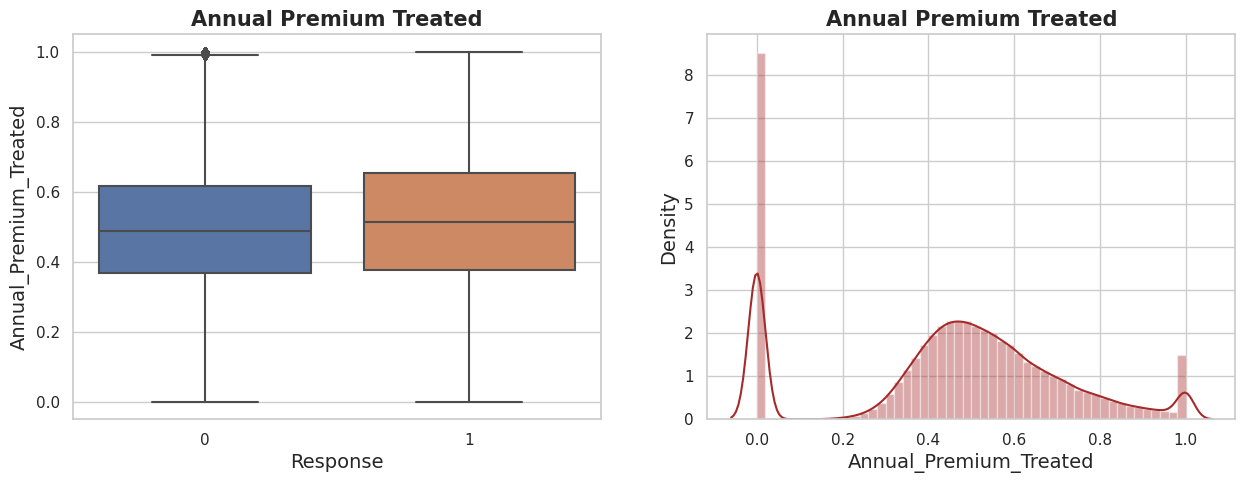

In [45]:
def show_ann_prem_outliers(df1):

    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    sns.boxplot(ax = axes[0], y = 'Annual_Premium_Treated',x = 'Response', data = df1)
    axes[0].set_xlabel(xlabel = 'Response', fontdict={'fontsize': 14})
    axes[0].set_ylabel(ylabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[0].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})

    sns.distplot(ax = axes[1], x = df1['Annual_Premium_Treated'], color='brown')
    axes[1].set_xlabel(xlabel = 'Annual_Premium_Treated', fontdict={'fontsize': 14})
    axes[1].set_ylabel(ylabel = 'Density', fontdict={'fontsize': 14})
    axes[1].set_title('Annual Premium Treated', fontdict={'fontsize': 15,  'fontweight' :'bold'})


show_ann_prem_outliers(df)

From the above plots we can see that there are no more outliers in Annual Premium.

##### What all outlier treatment techniques have you used and why did you use those techniques?

This function show_ann_prem_outliers(df) appears to be a Python function that creates a visualization of the distribution of the 'Annual_Premium_Treated' feature in the given DataFrame df.

Overall, this function provides a quick way to visualize the distribution of 'Annual_Premium_Treated' in the given DataFrame df, and to identify any outliers or unusual patterns in the data.

###**Encoding Object Columns**

In [46]:
#Changing categorical values to numerical values
df['Gender']=df['Gender'].map({'Female':1, 'Male': 0})
df['Vehicle_Age']=df['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year': 1, '> 2 Years':2})
df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1, 'No': 0})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_Treated,Vintage_Treated
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1,0.638245,0.716263
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0,0.521510,0.598616
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1,0.601797,0.058824
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0,0.438540,0.667820
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0,0.419591,0.100346


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [47]:
# Manipulate Features to minimize feature correlation and create new features
correlation = df.corr()
correlation['Response'].sort_values(ascending=False)[1:]

Vehicle_Damage            0.354400
Vehicle_Age               0.221874
Age                       0.111147
Annual_Premium            0.022575
Annual_Premium_Treated    0.022054
Region_Code               0.010570
Driving_License           0.010155
Vintage_Treated          -0.001050
Vintage                  -0.001050
id                       -0.001368
Gender                   -0.052440
Policy_Sales_Channel     -0.139042
Previously_Insured       -0.341170
Name: Response, dtype: float64

In [48]:
X=df.drop(columns=['id', 'Driving_License', 'Policy_Sales_Channel','Vintage', 'Response'])
y=df['Response']

In [49]:
# Fill any NaNs with mode()
fill_mode=lambda col: col.fillna(col.mode())
X= X.apply(fill_mode, axis =0)
df=df.apply(fill_mode, axis=0)
X

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Annual_Premium_Treated,Vintage_Treated
0,0,44,28.0,0,2,1,40454.0,0.638245,0.716263
1,0,76,3.0,0,1,0,33536.0,0.521510,0.598616
2,0,47,28.0,0,2,1,38294.0,0.601797,0.058824
3,0,21,11.0,1,0,0,28619.0,0.438540,0.667820
4,1,29,41.0,1,0,0,27496.0,0.419591,0.100346
...,...,...,...,...,...,...,...,...,...
381104,0,74,26.0,1,1,0,30170.0,0.464712,0.269896
381105,0,30,37.0,1,0,0,40016.0,0.630854,0.418685
381106,0,21,30.0,1,0,0,35118.0,0.548205,0.522491
381107,1,68,14.0,0,2,1,44617.0,0.708492,0.221453


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

We can clearly see that there is a huge difference between the dataset so we have to balance dataset.

In [50]:
# Handling Imbalanced Dataset (If needed)
# Check for imbalance in data
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

To handle the imbalance dataset we can use  resampling techniques.
Resampling is a method that involves repeatedly drawing samples from the training dataset.These methods can be used to build the distribution of a statistic based on our data, which can then be used to generate confidence intervals on a parameter estimate.

In [51]:
# Resampling
ros = RandomOverSampler(random_state=0)
X_new,y_new = ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Sample are :", len(y_new))
print("Original dataset shape{}".format(Counter(y)))
print("Resampled dataset shape{}".format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Sample are : 668798
Original dataset shapeCounter({0: 334399, 1: 46710})
Resampled dataset shapeCounter({1: 334399, 0: 334399})


### ***Splitting the Data in Train in Test sets***

In [52]:
# Split your data to train and test.
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=42, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((468158, 9), (200640, 9), (468158,), (200640,))

In [53]:
# Normalizing the Dataset using Standard Scalling Technique
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train
X_test

array([[-8.66070187e-01,  1.15460121e-02,  1.93391990e-01, ...,
        -1.59241362e+00, -1.76470363e+00, -7.90263803e-01],
       [-8.66070187e-01,  2.30941674e+00,  1.14413186e+00, ...,
         1.56887889e+00,  1.79841437e+00, -1.12494195e+00],
       [-8.66070187e-01,  1.05603271e+00,  1.14163667e-01, ...,
         7.26095417e-01,  8.48506400e-01, -1.23251707e+00],
       ...,
       [ 1.15464083e+00,  2.20443351e-01,  1.14163667e-01, ...,
        -2.14856835e-01, -2.12048388e-01,  1.12218276e+00],
       [-8.66070187e-01,  4.98973136e-01,  1.14163667e-01, ...,
         2.35587705e-01,  2.95651245e-01, -1.07713079e+00],
       [ 1.15464083e+00, -9.63308236e-01,  1.46104515e+00, ...,
        -2.82689117e-02, -1.74365158e-03, -1.28032823e+00]])

## ***7. ML Model Implementation***

### ML Model - 1
#**Logistic regression**

In [55]:
# ML Model - 1 Implementation
model = LogisticRegression(random_state=42)
model = model.fit(X_train, y_train)
# Making Prediction
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [58]:
# Visualizing evaluation Metric Score chart
r_lgt = recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt = precision_score(y_test, pred)
print("precision_score : ", p_lgt)

f1_lgt = f1_score(y_test, pred)
print("f1_score : ", f1_lgt)

A_lgt = accuracy_score(y_test, pred)
print("accuracy_score : ", A_lgt)

acu_lgt = roc_auc_score(y_test, pred)
print("ROC_AUC_score : ", acu_lgt)

recall_score :  0.9760905038605429
precision_score :  0.7071871395617071
f1_score :  0.8201601845968632
accuracy_score :  0.7855761562998405
ROC_AUC_score :  0.7852260859959421


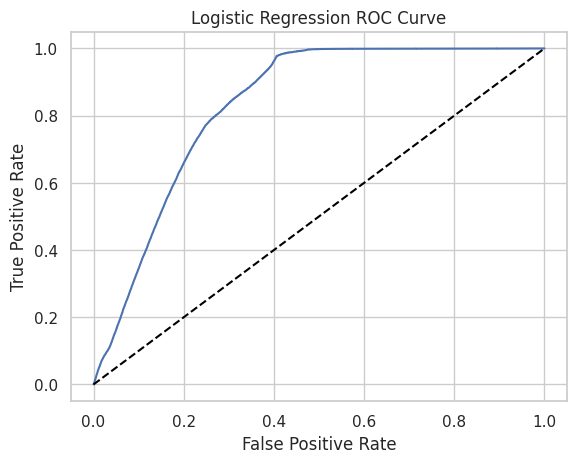

In [59]:
fpr, tpr, _= roc_curve(y_test, prob)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

[[59517 40619]
 [ 2403 98101]]


<Axes: >

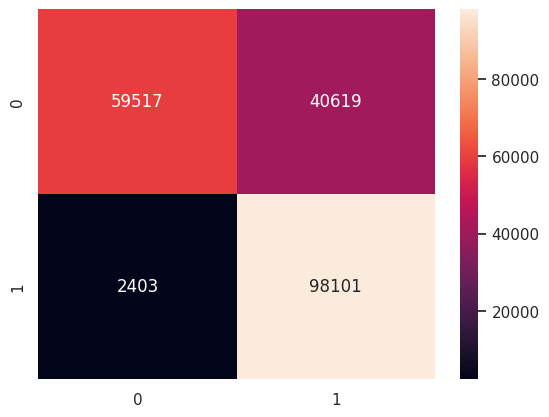

In [60]:
matrix=confusion_matrix(y_test, pred)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')

##### Which hyperparameter optimization technique have you used and why?

From this confusion matrix we see that the model is predicting positive response but also predicting negative response too.

In [62]:

from sklearn.metrics import classification_report
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61920
           1       0.98      0.71      0.82    138720

    accuracy                           0.79    200640
   macro avg       0.79      0.83      0.78    200640
weighted avg       0.86      0.79      0.79    200640



### ML Model - 2
##**RandomForest Classifier**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification problems. It builds decision trees on different samples and takes their majority vote for classification.

In [67]:
# Visualizing evaluation Metric Score chart
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:,1]

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Evaluation
r_rf = recall_score(y_test, rf_pred)
print("recall_score : ", r_lgt)

p_rf = precision_score(y_test, rf_pred)
print("precision_score : ", p_lgt)

f1_rf = f1_score(y_test, rf_pred)
print("f1_score : ", f1_lgt)

A_rf = accuracy_score(y_test, rf_pred)
print("accuracy_score : ", A_lgt)

acu_rf = roc_auc_score(y_test, rf_pred)
print("ROC_AUC_score : ", acu_lgt)


recall_score :  0.9760905038605429
precision_score :  0.7071871395617071
f1_score :  0.8201601845968632
accuracy_score :  0.7855761562998405
ROC_AUC_score :  0.7852260859959421


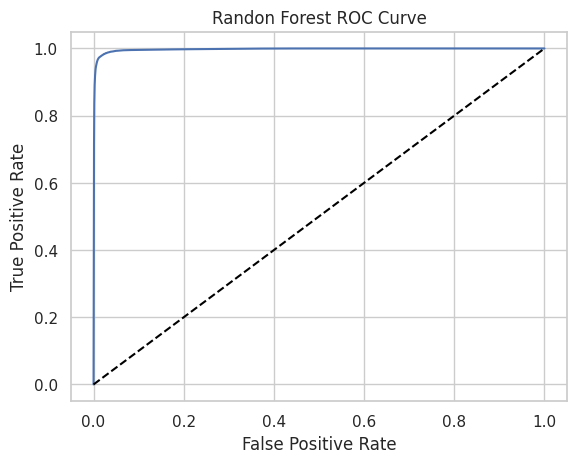

In [69]:
fpr, tpr, _= roc_curve(y_test, rf_proba)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Randon Forest ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

###**Confusion matrix**

[[ 88145  11991]
 [   399 100105]]


<Axes: >

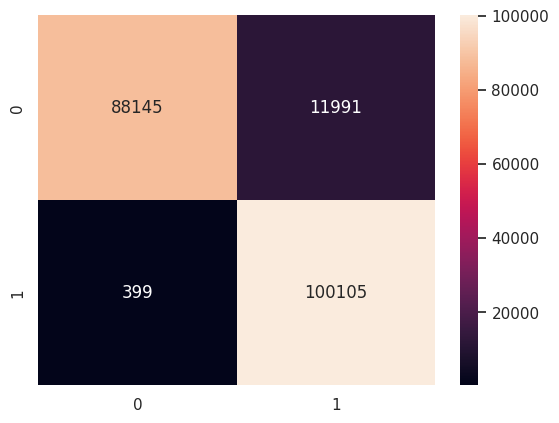

In [70]:
matrix=confusion_matrix(y_test, rf_pred)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')



The confusion matrix now shows that the model now is much better with predicting positive response.

In [71]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    100136
           1       0.89      1.00      0.94    100504

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



The model performs very well, so we can use it to predict unknown data.

### ML Model - 3
### ***XGBoost***

In [75]:
# ML Model - 3 Implementation
XG_model = XGBClassifier()
XG_model = XG_model.fit(X_train, y_train)

XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I am using XGBoost hyper parameter tuning  which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.

In [76]:
# Visualizing evaluation Metric Score chart
r_XG = recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG = precision_score(y_test, XG_pred)
print("precision_score : ", p_XG)

f1_XG = f1_score(y_test, XG_pred)
print("f1_score : ", f1_XG)

A_XG = accuracy_score(y_test, XG_pred)
print("accuracy_score : ", A_XG)

acu_XG = roc_auc_score(y_test, XG_pred)
print("ROC_AUC_score : ", acu_XG)

recall_score :  0.9373059778715275
precision_score :  0.7462865110236158
f1_score :  0.830959763245756
accuracy_score :  0.8089762759170654
ROC_AUC_score :  0.8087404699615686


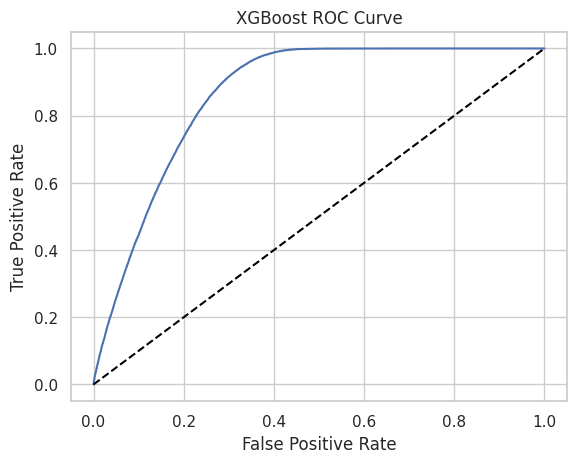

In [77]:
fpr, tpr, _= roc_curve(y_test, XG_prob)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('XGBoost ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

[[68110 32026]
 [ 6301 94203]]


<Axes: >

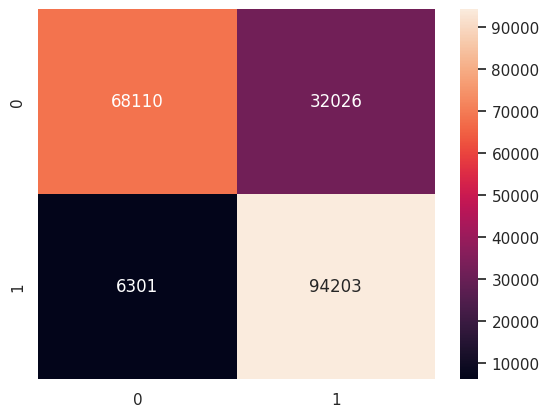

In [78]:
#Confusion metrix
matrix=confusion_matrix(y_test, XG_pred)
print(matrix)
sns.heatmap(matrix, annot=True, fmt='g')

From the confusion matrix we see that the model is bit better with predicting positive response.

###**KNN**

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:,1]

**Score matrix**

In [83]:
r_knn = recall_score(y_test, knn_pred)
print("recall_score : ", r_knn)

p_knn = precision_score(y_test, knn_pred)
print("precision_score : ", p_knn)

f1_knn = f1_score(y_test, knn_pred)
print("f1_score : ", f1_knn)

A_knn = accuracy_score(y_test, knn_pred)
print("accuracy_score : ", A_knn)

acu_knn = roc_auc_score(y_test, knn_pred)
print("ROC_AUC_score : ", acu_knn)

recall_score :  0.964727772028974
precision_score :  0.7914503542625788
f1_score :  0.8695406525209406
accuracy_score :  0.854994019138756
ROC_AUC_score :  0.8547923832582355


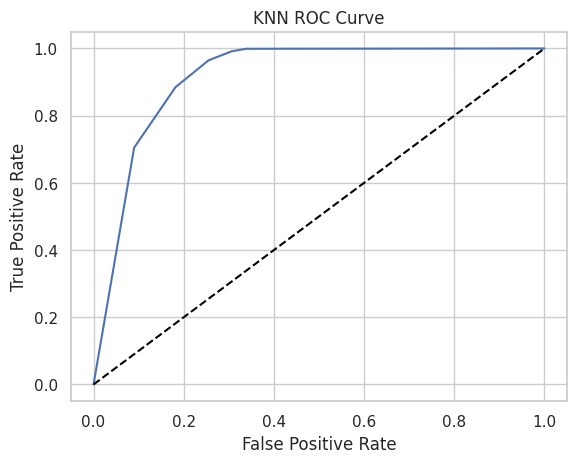

In [84]:
fpr, tpr, _= roc_curve(y_test, knn_proba)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('KNN ROC Curve')
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle='--', color='black')
plt.show()

In [85]:
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.95      0.84     78132
           1       0.96      0.79      0.87    122508

    accuracy                           0.85    200640
   macro avg       0.85      0.87      0.85    200640
weighted avg       0.88      0.85      0.86    200640



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [86]:
com = ['Logistic Regression', 'Randomforest', 'XGBClassifier','KNN']
data = {'Accuracy':[A_lgt,A_rf,A_XG,A_knn],'Recall':[r_lgt,r_rf,r_XG,r_knn],'Precision':[p_lgt,p_rf,p_XG,p_knn],'f1_score':[f1_lgt,f1_rf,f1_XG,f1_knn],'ROC_AUC':[acu_lgt,acu_rf,acu_XG,acu_knn]}
result = pd.DataFrame(data=data, index=com)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic Regression,0.785576,0.976091,0.707187,0.820160,0.785226
Randomforest,0.938248,0.996030,0.893029,0.941722,0.938141
XGBClassifier,0.808976,0.937306,0.746287,0.830960,0.808740
KNN,0.854994,0.964728,0.791450,0.869541,0.854792


From above result we can say that Randomforest algorithm of classification gives us positive business impact than other models.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have choose Randomforest model for as final pediction because  random forest produces good predictions that can be understood easily.It also presents an extraordinary combination of accuracy in prediction and model explicability amidst other conventional machine learning methods.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The variables suc as Age, Previous_Insured, Annual_Premium are more affecting the target variables.
Comparing ROC curve we can see that Random Forest model perform better. Because curves closer to the top-left corner, it indicates a better perormance.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***